# Nearest Means Classifier
This sheet shows how to use the helper function `plotDecBoundaries` that is provided for homework assignment 1.  This allows you to visualize the decision boundaries with a nearest mean classifier.  

First, let's import the the helper function from the `utils` directory.  Note that this assumes that the file `plotDecBoundaries` is in the directory `utils` which is a subdirectory in the directory containing this file.  Another approach is to put the `utils` directory someplace else on your hard-drive and include the parent directory in your `PYTHONPATH`.  The advantage of this second approach is that you can use the `utils` directory in many different projects that are not all in the same directory without duplicating the `utils` drctory.  For more information: [setting your Python path](https://www.techwalla.com/articles/how-to-set-your-python-path)

In [13]:
from utils.plotDecBoundaries import plotDecBoundaries

Now let's generate some data to pass to the `plotDecBoundaries` helper function.  We need to generate data from 2 classes.  Let's generate data from a Gaussian distribution with a given mean vectore and variance.  This assumes the $x$ and $y$ coordinates are independent and have the same variance.  The  `plotDecBoundaries` helper function expects to see this data passes as a single array with an associated labels array and 

In [25]:
m1 =  np.asarray([5, 5])
sigma1 = 2

m2 = np.asarray([5, -5])
sigma2 = 2

N1 = 200
N2 = 200
N = N1 + N2

x = np.zeros((N, 2))
x[:N1] = np.random.normal(0, sigma1, (N1, 2)) + m1
x[N1:] = np.random.normal(0, sigma2, (N2, 2)) + m2

labels = np.ones(N)
labels[N1:] += 1

sample_means = np.zeros((2,2))
sample_means[0] = np.mean(x[:N1], axis=0)
sample_means[1] = np.mean(x[N1:], axis=0)

Let's check to see what the sample means are compared to the means (ensemble average):

In [26]:
print(f'{N} total data points.  {N1} in class 1 and {N2} in class 2\n')

print(f'The mean in the generating pdf for class 1 is: {m1}')
print(f'The sample mean for class 1 data is: {sample_means[0]}\n')

print(f'The mean in the generating pdf for class 2 is: {m2}')
print(f'The sample mean for class 2 data is: {sample_means[1]}')

np.mean(x[N1:] ).shape

220 total data points.  20 in class 1 and 200 in class 2

The mean in the generating pdf for class 1 is: [5 5]
The sample mean for class 1 data is: [5.54331826 5.4458115 ]

The mean in the generating pdf for class 2 is: [ 5 -5]
The sample mean for class 2 data is: [ 5.09367225 -5.26510272]


()

Now let's use the helper function provided.

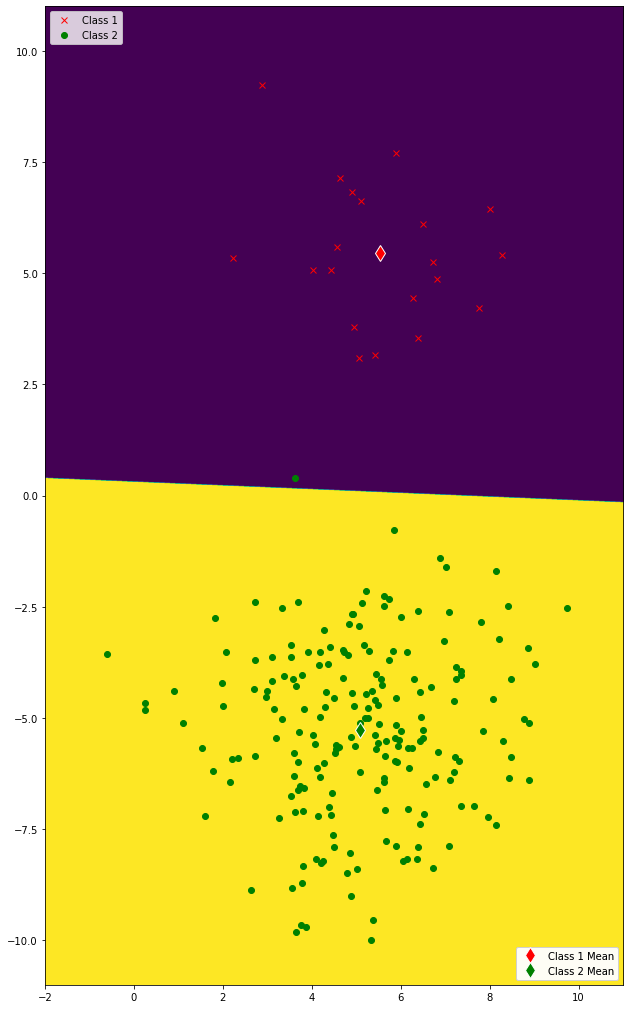

In [27]:
plotDecBoundaries(x, labels, sample_means, fsize=(24,18))

Let's write a function to make the data generation a little more compact:

In [31]:
def generate_gaussian_data(means, sigmas, Ns):
    x[:Ns[0]] = np.random.normal(0, sigmas[0], (Ns[0], 2)) + means[0]
    x[Ns[0]:] = np.random.normal(0, sigmas[1], (Ns[1], 2)) + means[1]

    labels = np.ones(Ns[0] + Ns[1])
    labels[Ns[0]:] += 1

    sample_means = np.zeros((2,2))
    sample_means[0] = np.mean(x[:Ns[0]], axis=0)
    sample_means[1] = np.mean(x[Ns[0]:], axis=0)

    return x, labels, sample_means

And now let's use this function to repeat the above...

In [33]:
means = np.asarray([ [5,5], [5, -5]])
sigmas = np.asarray([2,2])
Ns = np.asarray([20,200])

x, labels, sample_means = generate_gaussian_data(means, sigmas, Ns)

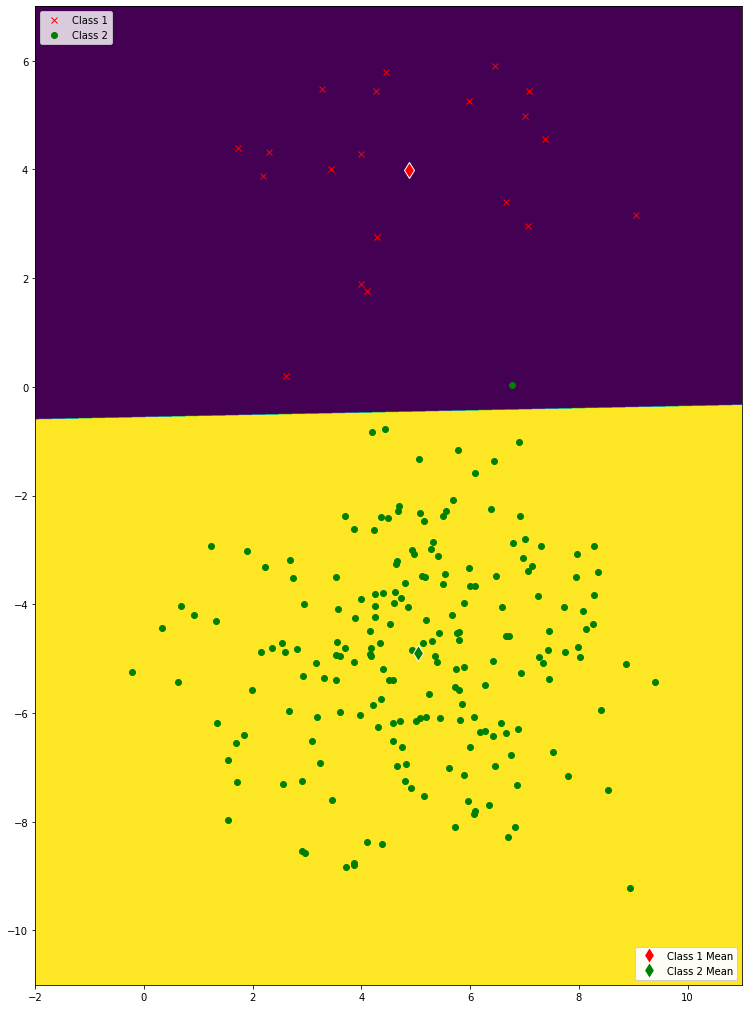

In [34]:
plotDecBoundaries(x, labels, sample_means, fsize=(24,18))

## More complex examples

The nearest means classifier makes reasonable intuitive sense.  How can we generate some data that will cause problems for this classifier?